# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice_number = len(merge_df["Mouse ID"].unique())  # find unique "Mouse ID" and then count them
mice_number


249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# groupby the dataset by "Mouse ID" and "Timepoint"
mice_timepoint = merge_df.groupby(["Mouse ID", "Timepoint"]).count()  # count how many rows exist in each group

# filter out the rows where the count was greater than 1 
duplicate_rows = mice_timepoint[mice_timepoint.iloc[:,0] > 1]  # use iloc and the first column to identify duplicates

# access the first duplicate's index
list(duplicate_rows.index[0])[0]  # convert the tuple into a list and pull out the first element

# convert the index (Mouse ID and Timepoint) back into columns 
duplicate_rows.reset_index()["Mouse ID"].unique()  # retrieve the unique Mouse ID associated with the duplicates


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
g989_ID = merge_df.loc[merge_df['Mouse ID']=='g989', :]  # only need the rows in Mouse ID with g989
g989_ID


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.loc[merge_df['Mouse ID'] != "g989", :]  # use != to create a boolean to keep only true statements
cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_number = len(cleaned_df["Mouse ID"].unique())  # find unique "Mouse ID" and then count them
cleaned_mice_number


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean() 
median_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
standard_error_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


In [10]:
# Assemble the resulting series into a single summary DataFrame.
statistics_summary = pd.DataFrame({
    "Mean Tumor Volume" : mean_tumor, 
    "Median Tumor Volume" : median_tumor, 
    "Tumor Volume Variance" : variance_tumor, 
    "Tumor Volume Std. Dev." : standard_deviation_tumor, 
    "Tumor Volume Std. Err." : standard_error_tumor})

statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_agg_summary = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean = "mean", 
    median = "median", 
    variance = "var", 
    std = "std", 
    sem = "sem")

stats_agg_summary

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# groupby 'Drug Regimen' column and count the rows in each
drug_regimen_counts = cleaned_df.groupby('Drug Regimen').size()

# sort the counts in descending order
drug_regimen_counts = drug_regimen_counts.sort_values(ascending = False)


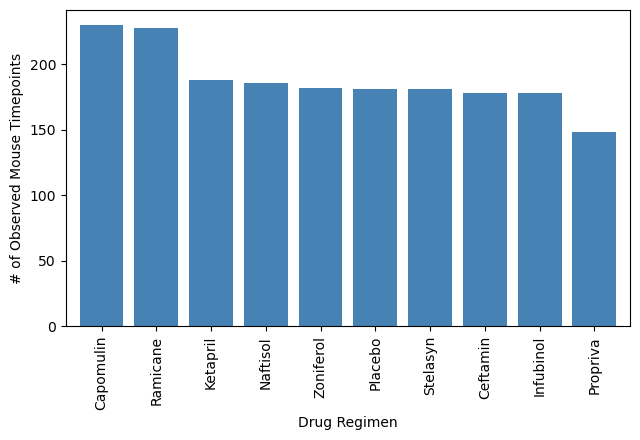

In [13]:
# Generate the bar plot with the Pandas DataFrame.plot() method
drug_regimen_counts.plot(kind ='bar', color ='steelblue', xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints", 
                        figsize = (6.5,4.5), width = 0.8)

# Display the plot
plt.tight_layout()
plt.show()


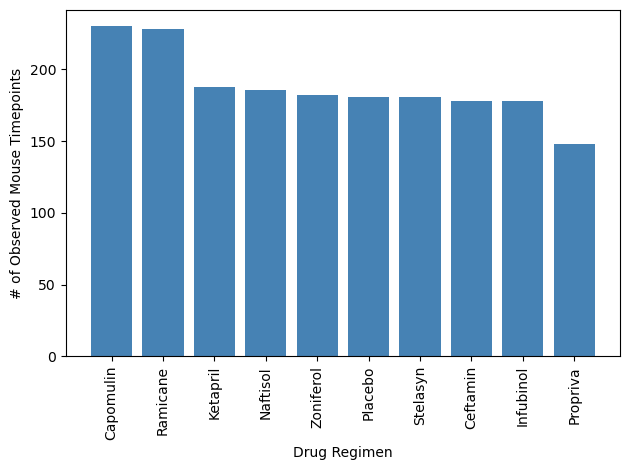

In [14]:
# Generate the bar plot with Matplotlib's pyplot methods
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color = "steelblue")

# Set the labels for the plot
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# rotate x-axis labels for readability
plt.xticks(rotation = 90)

# Display the plot
plt.tight_layout()
plt.show()


In [15]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# count how many male and female mice there are
sex_counts = cleaned_df.groupby("Sex")["Mouse ID"].nunique()  # use nunique to count only the unique mouse ID for each sex group

# create labels and colors for reference
labels = ["Female", "Male"]
colors = ["darkorange", "royalblue"]


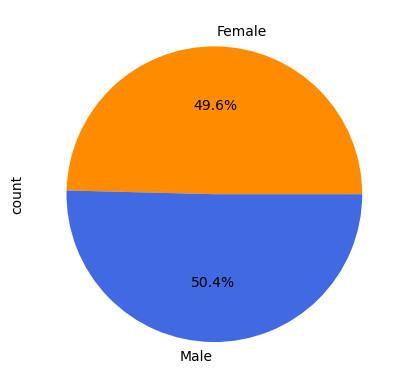

In [16]:
# Make the pie chart with the Pandas DataFrame.plot() method
sex_counts.plot(kind = 'pie', labels = labels, colors = colors, autopct = "%1.1f%%", ylabel = 'count')
plt.show()


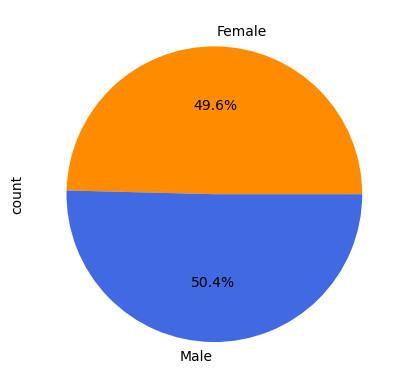

In [17]:
# Make the pie chart with Matplotlib's pyplot methods
plt.pie(sex_counts, labels = labels, colors = colors, autopct = "%1.1f%%")

# Set the labels for the plot
plt.ylabel("count")

plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Start by getting the last (greatest) timepoint for each mouse using max()
last_timepoint = cleaned_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume = pd.merge(last_timepoint, cleaned_df, on = ["Mouse ID", "Timepoint"], how = "left")

# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
                                      # use loc to find each treatment in the drug regimen column using OR (|) 
final_tumor_volume = last_tumor_volume.loc[(last_tumor_volume["Drug Regimen"] == "Capomulin") |
                                           (last_tumor_volume["Drug Regimen"] == "Ramicane") |
                                           (last_tumor_volume["Drug Regimen"] == "Infubinol") |
                                           (last_tumor_volume["Drug Regimen"] == "Ceftamin")]["Tumor Volume (mm3)"]
final_tumor_volume

0      67.973419
1      65.525743
3      62.999356
6      38.407618
7      43.047543
         ...    
238    68.594745
239    31.896238
240    64.729837
244    30.638696
245    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting) 
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
                                    # use loc to filter the specific treatment for selected rows within the tumor volume column
    treatment_data = last_tumor_volume.loc[last_tumor_volume['Drug Regimen'] == treatment, "Tumor Volume (mm3)"]

    # add subset
    tumor_volume_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    # find you IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # determine your upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    # print the results
    print(f"{treatment}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


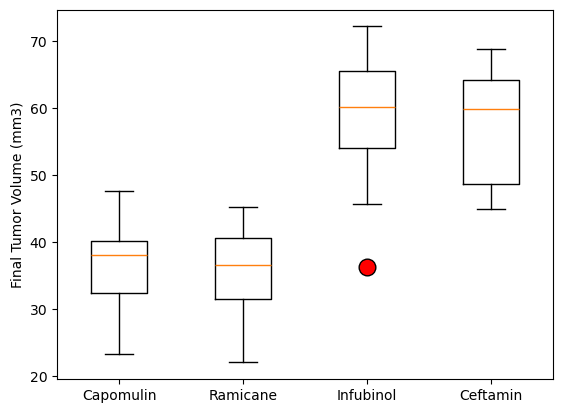

In [38]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 12})
plt.ylabel("Final Tumor Volume (mm3)")

# the range is 1 to 5 (which creates 4 tick marks) and the treatment_list will be the labels
plt.xticks(range(1, len(treatment_list) + 1), treatment_list)
plt.show()

# citation for flierprops: 
# Stack Overflow user. "Flier Colors in Boxplot with Matplotlib." Stack Overflow, 11 Apr. 2017, 
# https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib. Accessed 28 Jan. 2025.

## Line and Scatter Plots

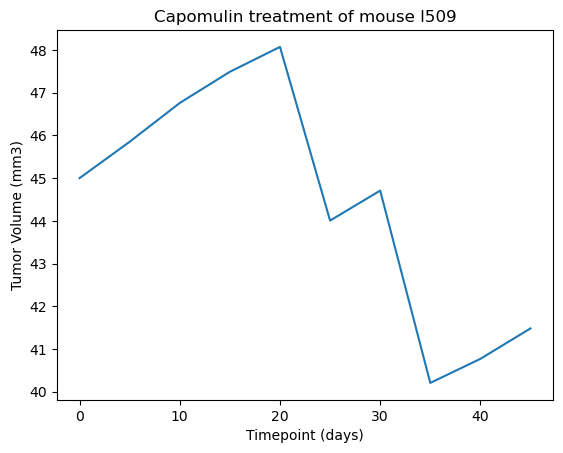

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


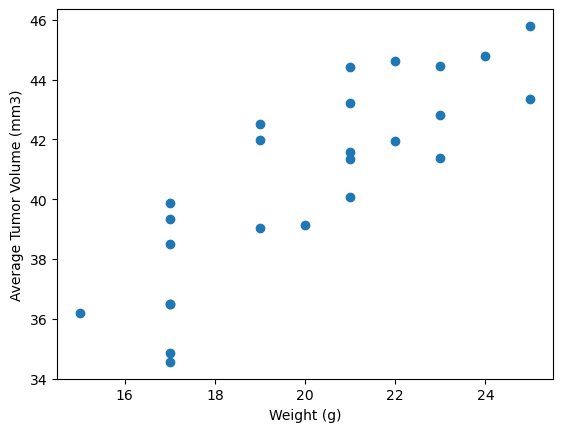

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


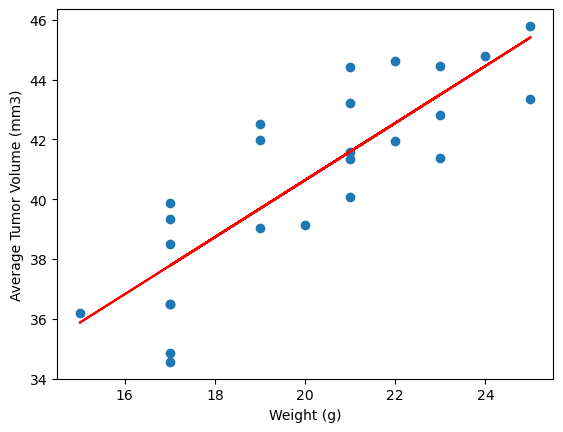

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
